In [2]:
%load_ext autoreload
%autoreload 2

import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '..'))
from symlie.misc.viz import plot2d

from symlie.misc.utils_results import pivot, assert_columns_same, get_and_check_Ps, stringify_dict, aggregate_dataset, plot_best, return_table
from symlie.misc.wandb import update_results_df, get_inspect_df
from symlie.model.setup import load_P_pred

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# Select dataframe to analyze
check_df = 'results'
reload = True

# check_df = 'inspect'
# reload = True

match check_df:
    case 'results':
        if reload:
            update_results_df()
        df = pd.read_pickle('../logs/store/results_df.pkl')
        plot_single_pivot = False
    case 'inspect':
        df_inspect = get_inspect_df(reload = reload)
        df = df_inspect
        plot_single_pivot = True

print(df.shape)

36


Retreiving wandb ep9fxvi5: 100%|██████████| 36/36 [00:07<00:00,  4.70it/s]
/Users/elias/EliasMBA/Projects/Uni/SymPDE/notebooks_symlie/../symlie/misc/wandb.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df_new = pd.concat([results_df_old, results_df]).reset_index(drop=True)


(579, 49)


In [21]:
df

,lr,net,bias,name,seed,tags,test,A_low,n_val,train,...,args_processed,do_return_model,n_hidden_layers,transform_kwargs,use_P_from_noise,persistent_workers,run_name,test_loss,n_classes,svd_rank
0,0.010,TrainP,False,None,3,"['new', 'noise']",True,NaN,1000,True,...,True,False,1.0,"{'eps_mult': [0, 1, 1, 1], 'only_flip': False}",False,True,dandy-donkey-1960,6.474450e-05,NaN,NaN
1,0.001,TrainP,False,None,3,"['new', 'noise']",True,NaN,1000,True,...,True,False,1.0,"{'eps_mult': [0, 1, 1, 1], 'only_flip': False}",False,True,swept-lion-1959,3.812419e-02,NaN,NaN
2,0.100,TrainP,False,None,3,"['new', 'noise']",True,NaN,1000,True,...,True,False,1.0,"{'eps_mult': [0, 1, 1, 1], 'only_flip': False}",False,True,atomic-planet-1958,1.422213e-07,NaN,NaN
3,0.001,TrainP,False,None,2,"['new', 'noise']",True,NaN,1000,True,...,True,False,1.0,"{'eps_mult': [0, 1, 1, 1], 'only_flip': False}",False,True,royal-mountain-1957,3.862118e-02,NaN,NaN
4,0.100,TrainP,False,None,2,"['new', 'noise']",True,NaN,1000,True,...,True,False,1.0,"{'eps_mult': [0, 1, 1, 1], 'only_flip': False}",False,True,glamorous-snowflake-1955,1.425501e-07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,0.100,TrainP,False,None,1,"['inspect', 'new', 'noise', 'svd']",True,None,1000,True,...,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,eager-firefly-2213,1.208998e-14,None,14.0
575,0.010,TrainP,False,None,1,"['inspect', 'new', 'noise', 'svd']",True,None,1000,True,...,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,toasty-paper-2213,7.349598e-02,None,3.0
576,0.100,TrainP,False,None,1,"['inspect', 'new', 'noise', 'svd']",True,None,1000,True,...,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,pleasant-pine-2213,9.551645e-12,None,30.0
577,0.100,TrainP,False,None,1,"['inspect', 'new', 'noise', 'svd']",True,None,1000,True,...,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,devoted-firefly-2212,4.830418e-15,None,7.0


dataset_name='noise', group=('[0, 0, 1, 0]', '1.0'), hparams_min=('test_loss', 0.1, 7.0)


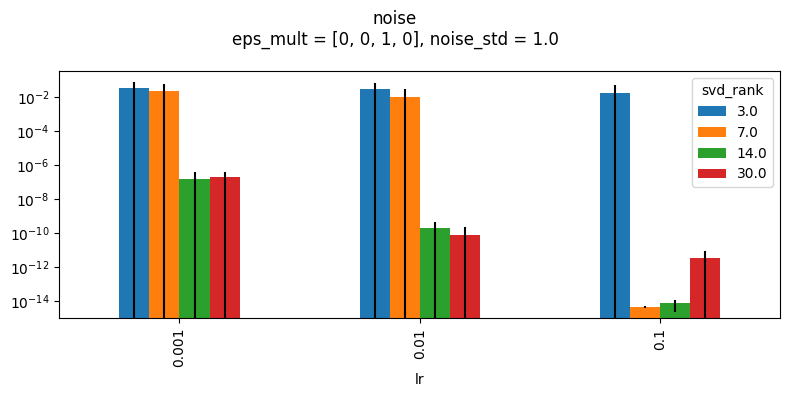

dataset_name='noise', group=('[0, 0, 1, 1]', '1.0'), hparams_min=('test_loss', 0.1, nan)


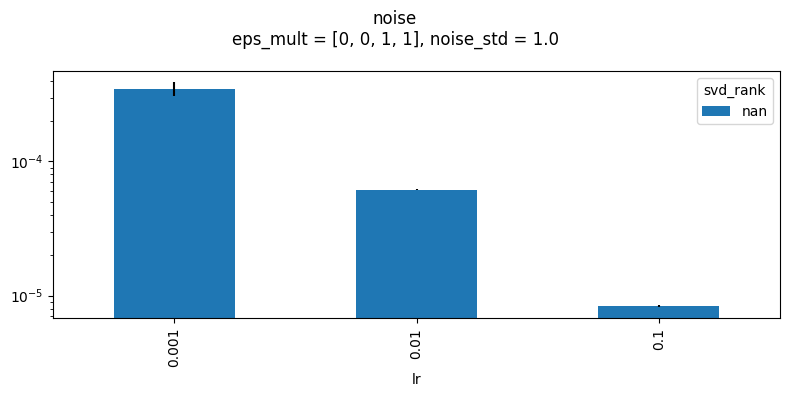

dataset_name='noise', group=('[0, 1, 1, 1]', '1.0'), hparams_min=('test_loss', 0.1, nan)


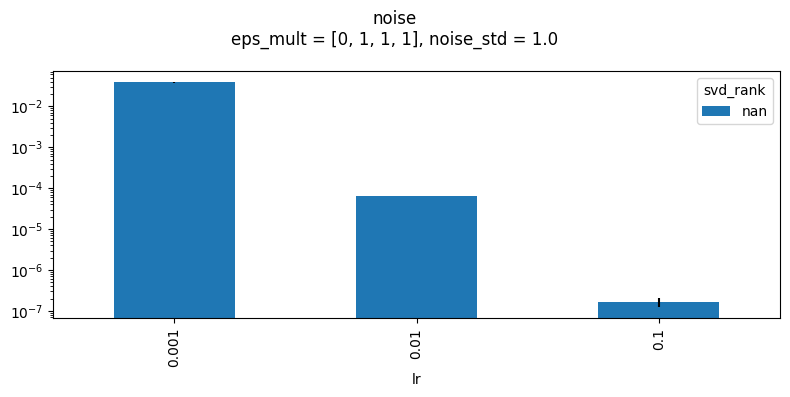

In [28]:
# Select step to analyze
step = 1
# step = 2

datasets_new = [
    # 'sine1d',
    # 'sine2d',
    # 'flower',
    # 'mnist',
    'noise'
]

datasets_inspect = [
    # 'sine1d-noise',
    # 'sine1dlayers',
    # 'sine1dtwo-hparam',
    'noise'
]
datasets = {'results' : datasets_new, 'inspect' : datasets_inspect}[check_df]

default_log = [
    'noise',
    'sine2d',
    # 'flower',
]

group_params = ['eps_mult', 'noise_std']
hyper_params  = ['n_train', 'lr', 'svd_rank', 'net'] if step == 2 else ['lr', 'svd_rank']

d_pivots, ddd, ddd_mean, ddd_std, mins = aggregate_dataset(
    datasets=datasets,
    df = df,
    step = step,
    group_params = group_params,
    hyper_params = hyper_params,
    check_df=check_df,
    default_log=default_log,
    plot_single_pivot=True,
)

In [26]:
if step == 2:
    plot_best(ddd_mean, ddd_std)
return_table(df, step, group_params, hyper_params)

test_loss                          \
lr                                        0.001                           
svd_rank                                   3.0                            
seed                                          1             2         3   
data_dir       eps_mult     noise_std                                     
../data/MNIST  [0, 1, 1, 1] 0.0             NaN           NaN       NaN   
                            0.1             NaN           NaN       NaN   
../data/flower [0, 0, 1, 1] 0.0             NaN           NaN       NaN   
                            0.1             NaN           NaN       NaN   
               [0, 1, 1, 1] 0.0             NaN           NaN       NaN   
                            0.1             NaN           NaN       NaN   
../data/noise  [0, 0, 1, 0] 1.0        0.076846  2.919860e-14  0.033282   
               [0, 0, 1, 1] 1.0             NaN           NaN       NaN   
               [0, 1, 1, 1] 1.0             NaN           NaN       NaN   
../data/sine1d [0, 0, 1, 0] 0.5             NaN           NaN       NaN   
../data/sine2d [0, 0, 1, 1] 0.1             NaN           NaN       NaN   
               [0, 1, 1, 1] 0.1             NaN           NaN       NaN   

                                                                             \
lr                                                                            
svd_rank                                       7.0                            
seed                                              1             2         3   
data_dir       eps_mult     noise_std                                         
../data/MNIST  [0, 1, 1, 1] 0.0                 NaN           NaN       NaN   
                            0.1                 NaN           NaN       NaN   
../data/flower [0, 0, 1, 1] 0.0                 NaN           NaN       NaN   
                            0.1                 NaN           NaN       NaN   
               [0, 1, 1, 1] 0.0                 NaN           NaN       NaN   
                            0.1                 NaN           NaN       NaN   
../data/noise  [0, 0, 1, 0] 1.0        1.788519e-10  2.148148e-07  0.068766   
               [0, 0, 1, 1] 1.0                 NaN           NaN       NaN   
               [0, 1, 1, 1] 1.0                 NaN           NaN       NaN   
../data/sine1d [0, 0, 1, 0] 0.5                 NaN           NaN       NaN   
../data/sine2d [0, 0, 1, 1] 0.1                 NaN           NaN       NaN   
               [0, 1, 1, 1] 0.1                 NaN           NaN       NaN   

                                                                   \
lr                                                                  
svd_rank                                       14.0                 
seed                                              1             2   
data_dir       eps_mult     noise_std                               
../data/MNIST  [0, 1, 1, 1] 0.0                 NaN           NaN   
                            0.1                 NaN           NaN   
../data/flower [0, 0, 1, 1] 0.0                 NaN           NaN   
                            0.1                 NaN           NaN   
               [0, 1, 1, 1] 0.0                 NaN           NaN   
                            0.1                 NaN           NaN   
../data/noise  [0, 0, 1, 0] 1.0        4.305833e-07  1.852233e-08   
               [0, 0, 1, 1] 1.0                 NaN           NaN   
               [0, 1, 1, 1] 1.0                 NaN           NaN   
../data/sine1d [0, 0, 1, 0] 0.5                 NaN           NaN   
../data/sine2d [0, 0, 1, 1] 0.1                 NaN           NaN   
               [0, 1, 1, 1] 0.1                 NaN           NaN   

                                                                   ...  \
lr                                                                 ...   
svd_rank                                                     30.0  ...   
seed                  

# Map

In [16]:
assert step == 1

In [8]:
def filter_on_tags(df, tags):
    return df[df['tags'].astype(str).str.contains('|'.join(tags))]

In [27]:
df_map = pd.read_pickle('../logs/store/map_df.pkl')

df_map_sync = filter_on_tags(df_map, tags = ['sine1d', 'noise'])
df_map_sync = df_map_sync.reset_index(drop=True)
df_map_sync

,run_id,tags,data_kwargs,transform_kwargs,seed,data_dir,svd_rank
0,3gi8lu9g,"['new', 'sine1d']","{'y_low': 1, 'y_high': 3, 'grid_size': (1, 7),...","{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",3,../data/sine1d,NaN
1,lh3nnnij,"['new', 'sine1d']","{'y_low': 1, 'y_high': 3, 'grid_size': (1, 7),...","{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",2,../data/sine1d,NaN
2,cpw6d6pz,"['new', 'sine1d']","{'y_low': 1, 'y_high': 3, 'grid_size': (1, 7),...","{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",1,../data/sine1d,NaN
3,vjewun0b,"['hparam', 'noise']","{'grid_size': (1, 7), 'noise_std': 1}","{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",3,../data/noise,NaN
4,g41hidqj,"['hparam', 'noise']","{'grid_size': (1, 7), 'noise_std': 1}","{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",2,../data/noise,NaN
5,xxidyaps,"['hparam', 'noise']","{'grid_size': (1, 7), 'noise_std': 1}","{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",1,../data/noise,NaN
6,5qbdclqh,"['new', 'noise']","{'grid_size': (7, 7), 'noise_std': 1}","{'eps_mult': [0.0, 0.0, 1.0, 1.0], 'only_flip'...",3,../data/noise,NaN
7,jb4gxwpb,"['new', 'noise']","{'grid_size': (7, 7), 'noise_std': 1}","{'eps_mult': [0.0, 0.0, 1.0, 1.0], 'only_flip'...",2,../data/noise,NaN
8,o7w74teb,"['new', 'noise']","{'grid_size': (7, 7), 'noise_std': 1}","{'eps_mult': [0.0, 0.0, 1.0, 1.0], 'only_flip'...",1,../data/noise,NaN
9,6pb0nn34,"['new', 'noise']","{'grid_size': (7, 7), 'noise_std': 1}","{'eps_mult': [0.0, 1.0, 1.0, 1.0], 'only_flip'...",3,../data/noise,NaN


In [19]:
sync_run_ids = list(df_map_sync['run_id'].values)

store_dir = '../logs/store'
# write the run_ids to a txt file
with open(os.path.join(store_dir, 'sync_run_ids.txt'), 'w') as f:
    f.write(f"{{{','.join(sync_run_ids)}}}")

# Let's check P's

In [10]:
df

,lr,net,bias,name,seed,tags,test,A_low,n_val,train,...,generate_data,model_summary,args_processed,do_return_model,n_hidden_layers,transform_kwargs,use_P_from_noise,persistent_workers,run_name,test_loss
0,0.001,TrainP,False,None,3,"[dev, inspect, noise, svd]",True,NaN,1000,True,...,False,False,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,rose-capybara-2244,3.328241e-02
1,0.001,TrainP,False,None,3,"[dev, inspect, noise, svd]",True,NaN,1000,True,...,False,False,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,genial-firefly-2246,5.417717e-09
2,0.001,TrainP,False,None,3,"[dev, inspect, noise, svd]",True,NaN,1000,True,...,False,False,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,ruby-hill-2244,6.876634e-02
3,0.001,TrainP,False,None,3,"[dev, inspect, noise, svd]",True,NaN,1000,True,...,False,False,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,lucky-bush-2243,3.563104e-09
4,0.010,TrainP,False,None,3,"[dev, inspect, noise, svd]",True,NaN,1000,True,...,False,False,True,False,1.0,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",False,True,astral-plasma-2241,9.761509e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.010,TrainP,False,None,3,"[hparam, inspect, noise]",True,NaN,1000,True,...,False,False,True,False,NaN,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",NaN,True,thriving-goat-1534,4.312742e-05
88,0.001,TrainP,False,None,2,"[hparam, inspect, noise]",True,NaN,1000,True,...,False,False,True,False,NaN,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",NaN,True,prosperous-peony-1532,2.545693e-06
89,0.001,TrainP,False,None,1,"[hparam, inspect, noise]",True,NaN,1000,True,...,False,False,True,False,NaN,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",NaN,True,twinkling-mandu-1530,1.364586e-06
90,0.100,TrainP,False,None,2,"[hparam, inspect, noise]",True,NaN,1000,True,...,False,False,True,False,NaN,"{'eps_mult': [0.0, 0.0, 1.0, 0.0], 'only_flip'...",NaN,True,vivid-wish-1530,3.477122e-05


In [9]:
# Select df
# d = df_map_sync
# d = df_map
d = df

# Filter d
d = filter_on_tags(d, tags = ['noise'])
transform_kwargs = {'eps_mult': [0.0, 1.0, 1.0, 1.0], 'only_flip': False}
d = d[d['transform_kwargs'] == transform_kwargs]
map_kwargs = assert_columns_same(d, ['data_kwargs', 'transform_kwargs', 'data_dir'])
print(f'{map_kwargs}=')

seeds = d['seed'].unique()
print(f'seeds={seeds}')

IndexError: index 0 is out of bounds for axis 0 with size 0

Found run_id 6pb0nn34
Found run_id dgmb6jhh
Found run_id vhgrhmcw


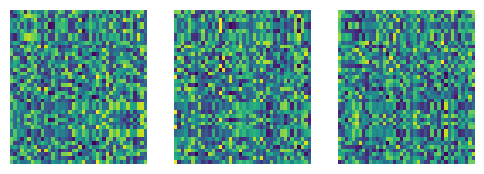

In [21]:
Ps = get_and_check_Ps(seeds, map_kwargs, use_P_from_noise = True)
# Ps = get_and_check_Ps([1], map_kwargs)
plot2d(Ps, l = 2, max_grid = 40)

In [15]:
import torch

from symlie.model.networks.implicit import LinearImplicit

In [1]:
linear_implicit = LinearImplicit(
    in_features = 7, 
    out_features = 7,
    bias = False,
    hidden_implicit_layers = [49, 49],
)

implicit_statedict = torch.load('../logs/store/implicit_P/otnoxw0l.pt')
# linear_implicit.implicit_P.load_state_dict(implicit_statedict)

linear_implicit.eval()

NameError: name 'LinearImplicit' is not defined

In [30]:
x = torch.randn((1,7))
x.shape

torch.Size([1, 7])

In [31]:
linear_implicit(x)

tensor([[ 0.0080,  0.0532,  0.0000,  0.3132,  0.3418, -0.1157,  0.1974]],
       grad_fn=<MmBackward0>)